Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term
Compiling model...
Building feed-forward neural network...


c:\Users\yesda\anaconda3\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(



'build' took 0.865400 s


'compile' took 2.062152 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [1.78e-01, 1.00e+00, 0.00e+00, 1.00e+00]    [1.76e-01, 1.03e+00, 0.00e+00, 1.00e+00]    [1.57e+00]    
1000      [9.17e-03, 7.78e-03, 1.74e-07, 3.65e-04]    [1.04e-02, 7.68e-03, 1.74e-07, 3.65e-04]    [8.05e-01]    
2000      [6.40e-03, 4.83e-03, 6.07e-07, 1.54e-04]    [6.72e-03, 5.08e-03, 6.07e-07, 1.54e-04]    [6.62e-01]    
3000      [3.25e-03, 3.36e-03, 7.94e-07, 6.15e-05]    [3.33e-03, 3.54e-03, 7.94e-07, 6.15e-05]    [4.74e-01]    
4000      [3.91e-04, 5.46e-04, 2.61e-07, 6.94e-06]    [4.37e-04, 4.30e-04, 2.61e-07, 6.94e-06]    [1.52e-01]    
5000      [5.46e-05, 3.55e-05, 4.48e-08, 1.12e-07]    [4.80e-05, 2.44e-05, 4.48e-08, 1.12e-07]    [2.34e-02]    
6000      [2.41e-05, 1.51e-05, 1.11e-08, 2.34e-08]    [2.06e-05, 1.38e-05, 1.11e-08, 2.34e-08]    [1.01e-02]    
7000      [6.29e-05, 1.

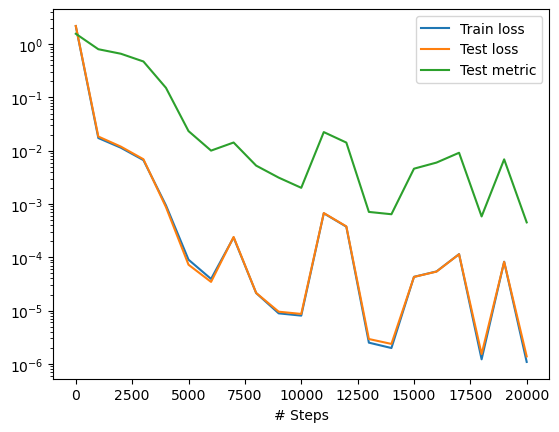

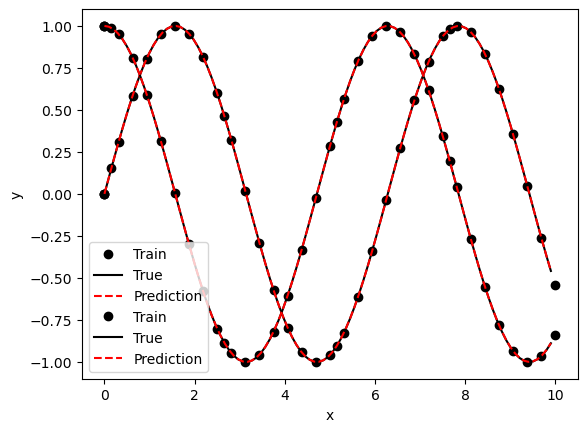

In [1]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""

import os
os.environ['DDE_BACKEND'] = 'tensorflow.compat.v1'

import deepxde as dde
import numpy as np
import os

def ode_system(x, y):
    """ODE system.
    dy1/dx = y2
    dy2/dx = -y1
    """
    # Most backends
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    # Backend jax
    # y_val, y_fn = y
    # y1, y2 = y_val[:, 0:1], y_val[:, 1:]
    # dy1_x, _ = dde.grad.jacobian(y, x, i=0)
    # dy2_x, _ = dde.grad.jacobian(y, x, i=1)
    return [dy1_x - y2, dy2_x + y1]


def boundary(_, on_initial):
    return on_initial


def func(x):
    """
    y1 = sin(x)
    y2 = cos(x)
    """
    return np.hstack((np.sin(x), np.cos(x)))


geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 1, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.053215 s



c:\Users\yesda\anaconda3\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.520646 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [8.13e+00]    [8.58e+00]    [5.76e-01]    
1000      [1.39e-03]    [2.42e-03]    [4.56e-03]    
2000      [1.50e-04]    [4.78e-04]    [1.19e-03]    
3000      [8.02e-05]    [3.50e-04]    [6.69e-04]    
4000      [6.01e-05]    [2.47e-04]    [7.94e-04]    
5000      [8.34e-04]    [9.73e-04]    [6.79e-03]    
6000      [1.54e-04]    [2.53e-04]    [2.77e-03]    
7000      [2.63e-05]    [1.01e-04]    [8.08e-04]    
8000      [1.06e-05]    [7.09e-05]    [3.32e-04]    
9000      [3.00e-05]    [7.75e-05]    [1.04e-03]    
10000     [2.58e-04]    [3.04e-04]    [3.40e-03]    

Best model at step 8000:
  train loss: 1.06e-05
  test loss: 7.09e-05
  test metric: [3.32e-04]

'train' took 7.755541 s

Saving loss history to c:\Users\yesda\OneDrive - Aalto University\Aalto Work\2023Hydrogen\Code\PINN_testing\loss.dat ...
Saving training data to c:\Users\yesda\OneDrive - Aalto University\Aalto W

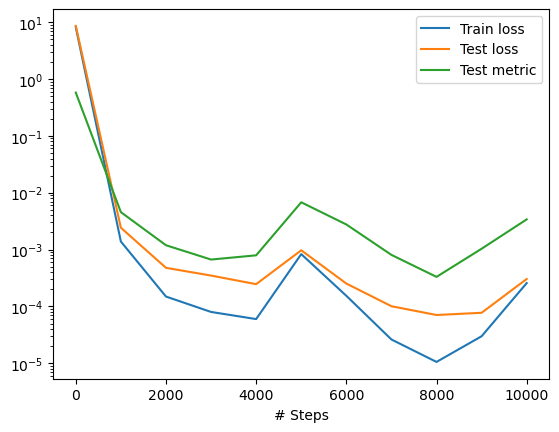

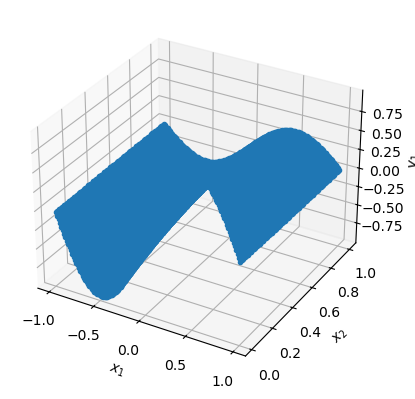

In [2]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np
# Backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Backend pytorch
# import torch
# Backend jax
# import jax.numpy as jnp
# Backend paddle
# import paddle


def pde(x, y):
    # Most backends
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    # Backend jax
    # dy_t, _ = dde.grad.jacobian(y, x, i=0, j=1)
    # dy_xx, _ = dde.grad.hessian(y, x, i=0, j=0)
    # Backend tensorflow.compat.v1 or tensorflow
    return (
        dy_t
        - dy_xx
        + tf.exp(-x[:, 1:])
        * (tf.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * tf.sin(np.pi * x[:, 0:1]))
    )
    # Backend pytorch
    # return (
    #     dy_t
    #     - dy_xx
    #     + torch.exp(-x[:, 1:])
    #     * (torch.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * torch.sin(np.pi * x[:, 0:1]))
    # )
    # Backend jax
    # return (
    #     dy_t
    #     - dy_xx
    #     + jnp.exp(-x[:, 1:])
    #     * (jnp.sin(np.pi * x[..., 0:1]) - np.pi ** 2 * jnp.sin(np.pi * x[..., 0:1]))
    # )
    # Backend paddle
    # return (
    #     dy_t
    #     - dy_xx
    #     + paddle.exp(-x[:, 1:])
    #     * (paddle.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * paddle.sin(np.pi * x[:, 0:1]))
    # )


def func(x):
    return np.sin(np.pi * x[:, 0:1]) * np.exp(-x[:, 1:])


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

data = dde.data.TimePDE(geomtime, pde, [], num_domain=40, solution=func, num_test=10000)

layer_size = [2] + [32] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)
net.apply_output_transform(
    # Backend tensorflow.compat.v1 or tensorflow
    lambda x, y: x[:, 1:2] * (1 - x[:, 0:1] ** 2) * y + tf.sin(np.pi * x[:, 0:1])
    # Backend pytorch
    # lambda x, y: x[:, 1:2] * (1 - x[:, 0:1] ** 2) * y + torch.sin(np.pi * x[:, 0:1])
    # Backend jax
    # lambda x, y: x[..., 1:2] * (1 - x[..., 0:1] ** 2) * y + jnp.sin(np.pi * x[..., 0:1])
    # Backend paddle
    # lambda x, y: x[:, 1:2] * (1 - x[:, 0:1] ** 2) * y + paddle.sin(np.pi * x[:, 0:1])
)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term
Compiling model...
Building feed-forward neural network...

'build' took 0.206246 s



c:\Users\yesda\anaconda3\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(



'compile' took 0.398862 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.60e-01]    [2.23e-01]    [1.03e+00]    
1000      [1.36e-04]    [1.53e-04]    [2.70e-02]    
2000      [4.56e-05]    [8.23e-05]    [1.99e-02]    
3000      [2.54e-05]    [5.84e-05]    [1.67e-02]    
4000      [1.99e-05]    [5.24e-05]    [1.58e-02]    
5000      [2.12e-05]    [5.05e-05]    [1.55e-02]    
6000      [1.27e-05]    [4.73e-05]    [1.51e-02]    
7000      [9.03e-06]    [4.20e-05]    [1.42e-02]    
8000      [8.25e-06]    [4.12e-05]    [1.40e-02]    
9000      [4.52e-05]    [6.94e-05]    [1.82e-02]    
10000     [2.08e-05]    [4.48e-05]    [1.47e-02]    

Best model at step 8000:
  train loss: 8.25e-06
  test loss: 4.12e-05
  test metric: [1.40e-02]

'train' took 3.059567 s

Saving loss history to c:\Users\yesda\OneDrive - Aalto University\Aalto Work\2023Hydrogen\Code\PINN_testing\loss.dat ...
Saving training data to c:\Users\yesda\OneDrive - Aalto University\Aalto 

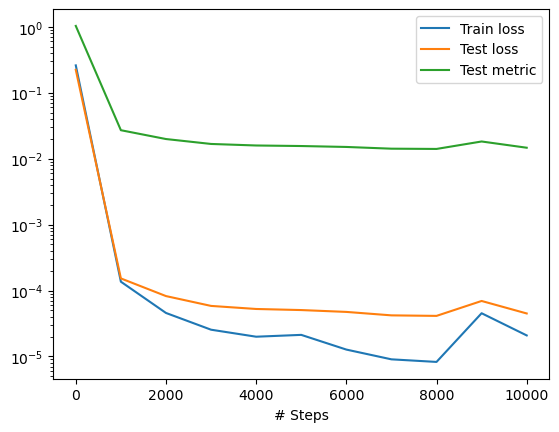

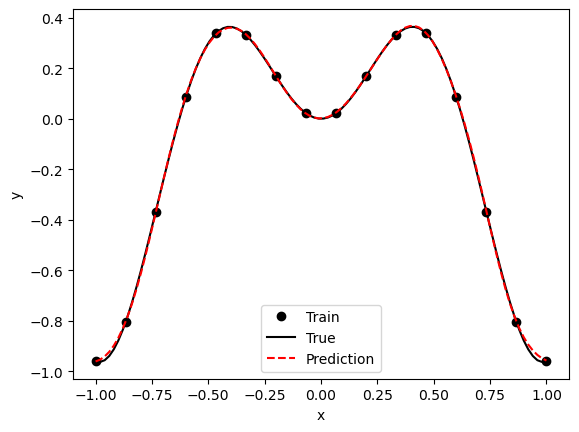

In [1]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np


def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)


geom = dde.geometry.Interval(-1, 1)
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)